# Exploratory Data Analysis (EDA): Cars Dataset

**Objective:** Understand, clean, and explore the Cars dataset to uncover distributions, relationships, and actionable insights.

# Executive Summary

## Key Findings

**Market Insights:**
- 5-seater vehicles dominate the market as the standard configuration
- Nissan leads in model diversity while Porsche maintains highest performance positioning
- Premium brands command significant price premiums independent of specifications

**Performance Analysis:**
- Electric and hybrid vehicles demonstrate superior acceleration (7-8 seconds median) with consistent performance
- Strong correlation exists between horsepower and acceleration capability
- High horsepower vehicles (>300 hp) show statistically significant faster acceleration (p < 0.0001)

**Price Drivers:**
- Horsepower, torque, and engine capacity are primary price determinants
- Fuel type creates distinct market segments with different pricing structures
- Top speed and acceleration are independent metrics - maximum velocity doesn't guarantee rapid acceleration

**Statistical Validation:**
- Both hypothesis tests achieved p < 0.0001, confirming observed patterns are genuine relationships, not random chance
- Sports/performance cars (≤6 sec 0-100 km/h) strongly associated with 2-4 seat configurations

## 1. Imports & Setup

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

## 2. Data Loading

**Note:** Encoding is set to `latin1` to avoid read errors.

In [24]:
cars_data = pd.read_csv("Cars Datasets 2025.csv",encoding='latin1')

## 3. Initial Inspection

In [25]:
cars_data.head(10)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm
5,BMW,Mclaren 720s,V8,"3,994 cc",710 hp,341 km/h,2.9 sec,"$499,000",Petrol,2,770 Nm
6,ASTON MARTIN,VANTAGE F1,V8,"3,982 cc",656 hp,314 km/h,3.6 sec,"$193,440",Petrol,2,685 Nm
7,BENTLEY,Continental GT Azure,V8,"3,996 cc",550 hp,318 km/h,4.0 sec,"$311,000",Petrol,4,900 Nm
8,LAMBORGHINI,VENENO ROADSTER,V12,"6,498 cc",750 hp,356 km/h,2.9 sec,"$4,500,000",Petrol,2,690 Nm
9,FERRARI,F8 TRIBUTO,V8,"3,900 cc",710 hp,340 km/h,2.9 sec,"$280,000",Petrol,2,770 Nm


In [26]:
cars_data.info()
cars_data.describe()
cars_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          3
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       1
dtype: int64

## 4. Categorical Distributions

In [27]:
print(cars_data['Company Names'].value_counts().head(10))
print(cars_data['CC/Battery Capacity'].value_counts().head(10))
print(cars_data['HorsePower'].value_counts().head(20))
print(cars_data['Fuel Types'].value_counts())
print(cars_data['Cars Prices'].head(20))

Company Names
Nissan        149
Volkswagen    109
Porsche        96
Mazda          87
Mitsubishi     60
GMC            59
Chevrolet      58
Peugeot        54
Kia            54
Ford           54
Name: count, dtype: int64
CC/Battery Capacity
1984 cc     31
2,000 cc    31
2,500 cc    25
1591 cc     22
3996 cc     20
1,998 cc    19
6200 cc     18
3600 cc     18
2894 cc     17
5552 cc     17
Name: count, dtype: int64
HorsePower
355 hp    23
310 hp    22
200 hp    21
300 hp    20
563 hp    20
130 hp    18
420 hp    17
181 hp    16
400 HP    16
290 hp    15
187 hp    15
180 hp    15
136 hp    13
400 hp    12
147 hp    12
170 hp    12
204 hp    10
340 hp    10
120 hp     9
291 hp     9
Name: count, dtype: int64
Fuel Types
Petrol                     871
Diesel                     106
Electric                    97
Hybrid                      79
Petrol/Diesel               16
Petrol/Hybrid               16
Plug-in Hybrid               5
Hybrid (Petrol)              4
Diesel/Petrol               

## 5. Feature Engineering

In [28]:
cars_data_copy = cars_data.copy()
def extract_number(text):
    if pd.isna(text):
        return np.nan
    # Removing commas and extracting numbers
    import re
    numbers = re.findall(r'\d+\.?\d*', str(text).replace(',', ''))
    if numbers:
        return float(numbers[0])
    return np.nan

cars_data_copy['Cars Prices'] = cars_data_copy['Cars Prices'].apply(extract_number)
cars_data_copy['CC/Battery Capacity'] = cars_data_copy['CC/Battery Capacity'].apply(extract_number)
cars_data_copy['HorsePower'] = cars_data_copy['HorsePower'].apply(extract_number)
cars_data_copy['Total Speed'] = cars_data_copy['Total Speed'].apply(extract_number)
cars_data_copy['Performance(0 - 100 )KM/H'] = cars_data_copy['Performance(0 - 100 )KM/H'].apply(extract_number)
cars_data_copy['Torque'] = cars_data_copy['Torque'].apply(extract_number)
cars_data_copy.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Names              1218 non-null   object 
 1   Cars Names                 1218 non-null   object 
 2   Engines                    1218 non-null   object 
 3   CC/Battery Capacity        1213 non-null   float64
 4   HorsePower                 1218 non-null   float64
 5   Total Speed                1218 non-null   float64
 6   Performance(0 - 100 )KM/H  1212 non-null   float64
 7   Cars Prices                1217 non-null   float64
 8   Fuel Types                 1218 non-null   object 
 9   Seats                      1218 non-null   object 
 10  Torque                     1217 non-null   float64
dtypes: float64(6), object(5)
memory usage: 104.8+ KB


In [31]:
def standardize_seats(value):
    if pd.isna(value):
        return np.nan
    # removing spaces and handling special cases
    import re    
    val_str = str(value).strip()
    if val_str == '2+2':
        return 4
    numbers = re.findall(r'\d+', val_str)
    if not numbers:
        return np.nan
    numbers = [int(n) for n in numbers]
    return max(numbers)

cars_data_copy['Seats'] = cars_data_copy['Seats'].apply(standardize_seats)


## 6. Column Standardization

In [32]:
cars_data_copy = cars_data_copy.rename(columns={'CC/Battery Capacity': 'Battery_Capacity(cc)', 'HorsePower': 'HorsePower(hp)', 
                                                      'Cars Prices': 'Car_Price(USD)', 'Total Speed': 'Top_Speed(km/h)', 
                                                      'Performance(0 - 100 )KM/H': '(0km/h - 100km/h)sec',
                                                      'Company Names': 'Company_Name', 'Fuel Types': 'Fuel_Type',
                                                      'Seats': 'Number_of_Seats','Cars Names': 'Car_Name', 'Torque': 'Torque(Nm)'})
cars_data_copy.head(10)

,Company_Name,Car_Name,Engines,Battery_Capacity(cc),HorsePower(hp),Top_Speed(km/h),(0km/h - 100km/h)sec,Car_Price(USD),Fuel_Type,Number_of_Seats,Torque(Nm)
0,FERRARI,SF90 STRADALE,V8,3990.0,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2,800.0
1,ROLLS ROYCE,PHANTOM,V12,6749.0,563.0,250.0,5.3,460000.0,Petrol,5,900.0
2,Ford,KA+,1.2L Petrol,1200.0,70.0,165.0,10.5,12000.0,Petrol,5,100.0
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,3.2,161000.0,Petrol,4,900.0
4,AUDI,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.6,253290.0,Petrol,2,560.0
5,BMW,Mclaren 720s,V8,3994.0,710.0,341.0,2.9,499000.0,Petrol,2,770.0
6,ASTON MARTIN,VANTAGE F1,V8,3982.0,656.0,314.0,3.6,193440.0,Petrol,2,685.0
7,BENTLEY,Continental GT Azure,V8,3996.0,550.0,318.0,4.0,311000.0,Petrol,4,900.0
8,LAMBORGHINI,VENENO ROADSTER,V12,6498.0,750.0,356.0,2.9,4500000.0,Petrol,2,690.0
9,FERRARI,F8 TRIBUTO,V8,3900.0,710.0,340.0,2.9,280000.0,Petrol,2,770.0


## 7. Missing Value Analysis

In [33]:
missing_values=cars_data_copy.isnull().sum()
print(missing_values)
missing_values_perc = cars_data_copy.isnull().sum()/len(cars_data_copy) * 100
print(missing_values_perc)

Company_Name            0
Car_Name                0
Engines                 0
Battery_Capacity(cc)    5
HorsePower(hp)          0
Top_Speed(km/h)         0
(0km/h - 100km/h)sec    6
Car_Price(USD)          1
Fuel_Type               0
Number_of_Seats         0
Torque(Nm)              1
dtype: int64
Company_Name            0.000000
Car_Name                0.000000
Engines                 0.000000
Battery_Capacity(cc)    0.410509
HorsePower(hp)          0.000000
Top_Speed(km/h)         0.000000
(0km/h - 100km/h)sec    0.492611
Car_Price(USD)          0.082102
Fuel_Type               0.000000
Number_of_Seats         0.000000
Torque(Nm)              0.082102
dtype: float64


## 8. Progressive Data Cleaning

In [34]:
display(cars_data_copy[cars_data_copy['Battery_Capacity(cc)'].isnull()][
     ['Company_Name', 'Car_Name', 'Engines', 'Fuel_Type', 'Battery_Capacity(cc)']])
display(cars_data_copy[cars_data_copy['Car_Price(USD)'].isnull()][
     ['Company_Name', 'Car_Name', 'Engines', 'Fuel_Type', 'Car_Price(USD)',]])
display(cars_data_copy[cars_data_copy['Torque(Nm)'].isnull()][
     ['Company_Name', 'Car_Name', 'Engines', 'Fuel_Type', 'Torque(Nm)']])

,Company_Name,Car_Name,Engines,Fuel_Type,Battery_Capacity(cc)
97,MERCEDES,BENZ EQS 53,ELECTRIC MOTOR,Electric,NaN
255,Nissan,Urvan,2.5L Turbo Diese,Diesel,NaN
994,Peugeot,Partner Electric,Electric Motor,Electric,NaN
995,Peugeot,Expert Electric,Electric Motor,Electric,NaN
1147,Mazda,RX-Vision Concept,Rotary SkyActiv-R,Petrol (Hybrid),NaN


,Company_Name,Car_Name,Engines,Fuel_Type,Car_Price(USD)
1147,Mazda,RX-Vision Concept,Rotary SkyActiv-R,Petrol (Hybrid),NaN


,Company_Name,Car_Name,Engines,Fuel_Type,Torque(Nm)
1147,Mazda,RX-Vision Concept,Rotary SkyActiv-R,Petrol (Hybrid),NaN


In [35]:
print(f"Original records: {len(cars_data_copy)}")
new_cars_data_copy = cars_data_copy.dropna(subset=['Car_Price(USD)','Torque(Nm)'])
print(f"After dropping Price/Torque missing: {len(new_cars_data_copy)}")
print(f"Records lost: {len(cars_data_copy) - len(new_cars_data_copy)} ({(len(cars_data_copy) - len(new_cars_data_copy))/len(cars_data_copy)*100:.2f}%)")

Original records: 1218
After dropping Price/Torque missing: 1217
Records lost: 1 (0.08%)


In [36]:
print("\nSample of CC values across different companies:")
print(new_cars_data_copy.groupby('Company_Name')['Battery_Capacity(cc)'].agg(['min', 'max', 'mean', 'std']).head(10))

print("\nCC distribution for a single company (e.g., BMW):")
bmw_cars = new_cars_data_copy[new_cars_data_copy['Company_Name'] == 'BMW']
print(bmw_cars[['Car_Name', 'Battery_Capacity(cc)', 'HorsePower(hp)']].head(10))


Sample of CC values across different companies:
                 min     max         mean          std
Company_Name                                          
ASTON MARTIN  3982.0  6496.0  5080.272727   947.366359
AUDI            95.0  5204.0  2830.428571  1344.011628
Acura         1500.0  3500.0  2832.296296   838.103024
BENTLEY       3996.0  3996.0  3996.000000          NaN
BMW             11.6  4935.0  2296.331707  1095.932124
Bugatti       7993.0  7993.0  7993.000000     0.000000
Cadillac       100.0  6200.0  3250.000000  2078.334353
Chevrolet       66.0  6600.0  3775.241379  2100.899852
FERRARI       3900.0  6496.0  4486.888889  1139.439823
Ford            68.0  7300.0  2812.129630  1725.864312

CC distribution for a single company (e.g., BMW):
              Car_Name  Battery_Capacity(cc)  HorsePower(hp)
5         Mclaren 720s                3994.0           710.0
99               M5 CS                4395.0           627.0
100             M4 GTS                2993.0           49

In [37]:
another_cars_data_copy = new_cars_data_copy.dropna(subset=['Battery_Capacity(cc)'])
print(f"\nAfter dropping missing CC: {len(another_cars_data_copy)} records")
print(f"Total records lost so far: {len(new_cars_data_copy) - len(another_cars_data_copy)} ({(len(new_cars_data_copy) - len(another_cars_data_copy))/len(new_cars_data_copy)*100:.2f}%)")


After dropping missing CC: 1213 records
Total records lost so far: 4 (0.33%)


## 9. Performance Feature Validation

In [38]:
df_with_perf = another_cars_data_copy[another_cars_data_copy['(0km/h - 100km/h)sec'].notna()].copy()
df_missing_perf = another_cars_data_copy[another_cars_data_copy['(0km/h - 100km/h)sec'].isna()].copy()

print(f"Cars with performance data: {len(df_with_perf)}")
print(f"Cars missing performance data: {len(df_missing_perf)}")

# Checking correlation of performance with other features
print("\nCorrelation with Performance (0-100 km/h):")
correlation = df_with_perf[['HorsePower(hp)', 'Battery_Capacity(cc)', 
                             'Top_Speed(km/h)', 'Torque(Nm)', 
                             '(0km/h - 100km/h)sec']].corr()['(0km/h - 100km/h)sec'].sort_values()
print(correlation)

from sklearn.linear_model import LinearRegression

features = ['HorsePower(hp)', 'Battery_Capacity(cc)', 'Torque(Nm)']
X_train = df_with_perf[features]
y_train = df_with_perf['(0km/h - 100km/h)sec']

# Train simple model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing values
X_missing = df_missing_perf[features]
predicted_perf = model.predict(X_missing)

print(f"\nPredicted performance values for {len(predicted_perf)} missing records:")
print(predicted_perf)

# Fill missing values with predictions
another_cars_data_copy.loc[another_cars_data_copy['(0km/h - 100km/h)sec'].isna(), '(0km/h - 100km/h)sec'] = predicted_perf

print(f"\n Performance values imputed using regression model")
print(f"  Based on: HorsePower, Battery_Capacity, Torque")


Cars with performance data: 1208
Cars missing performance data: 5

Correlation with Performance (0-100 km/h):
Top_Speed(km/h)        -0.784836
HorsePower(hp)         -0.680182
Battery_Capacity(cc)   -0.247473
Torque(Nm)             -0.206604
(0km/h - 100km/h)sec    1.000000
Name: (0km/h - 100km/h)sec, dtype: float64

Predicted performance values for 5 missing records:
[10.28666829  9.63365824 10.30341805  9.63365824  9.55230088]

 Performance values imputed using regression model
  Based on: HorsePower, Battery_Capacity, Torque


In [39]:
print(f"Records retained: {len(another_cars_data_copy)}/{len(new_cars_data_copy)} ({len(another_cars_data_copy)/len(new_cars_data_copy)*100:.1f}%)")
print(another_cars_data_copy.isnull().sum())
Cars_data_cleaned = another_cars_data_copy
Cars_data_cleaned.info()
print(Cars_data_cleaned[['HorsePower(hp)', 'Battery_Capacity(cc)', 'Top_Speed(km/h)', 
                '(0km/h - 100km/h)sec', 'Car_Price(USD)', 'Torque(Nm)']].describe())

Records retained: 1213/1217 (99.7%)
Company_Name            0
Car_Name                0
Engines                 0
Battery_Capacity(cc)    0
HorsePower(hp)          0
Top_Speed(km/h)         0
(0km/h - 100km/h)sec    0
Car_Price(USD)          0
Fuel_Type               0
Number_of_Seats         0
Torque(Nm)              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1213 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_Name          1213 non-null   object 
 1   Car_Name              1213 non-null   object 
 2   Engines               1213 non-null   object 
 3   Battery_Capacity(cc)  1213 non-null   float64
 4   HorsePower(hp)        1213 non-null   float64
 5   Top_Speed(km/h)       1213 non-null   float64
 6   (0km/h - 100km/h)sec  1213 non-null   float64
 7   Car_Price(USD)        1213 non-null   float64
 8   Fuel_Type             1213 non-null   object 
 9

## 10. Visualizations

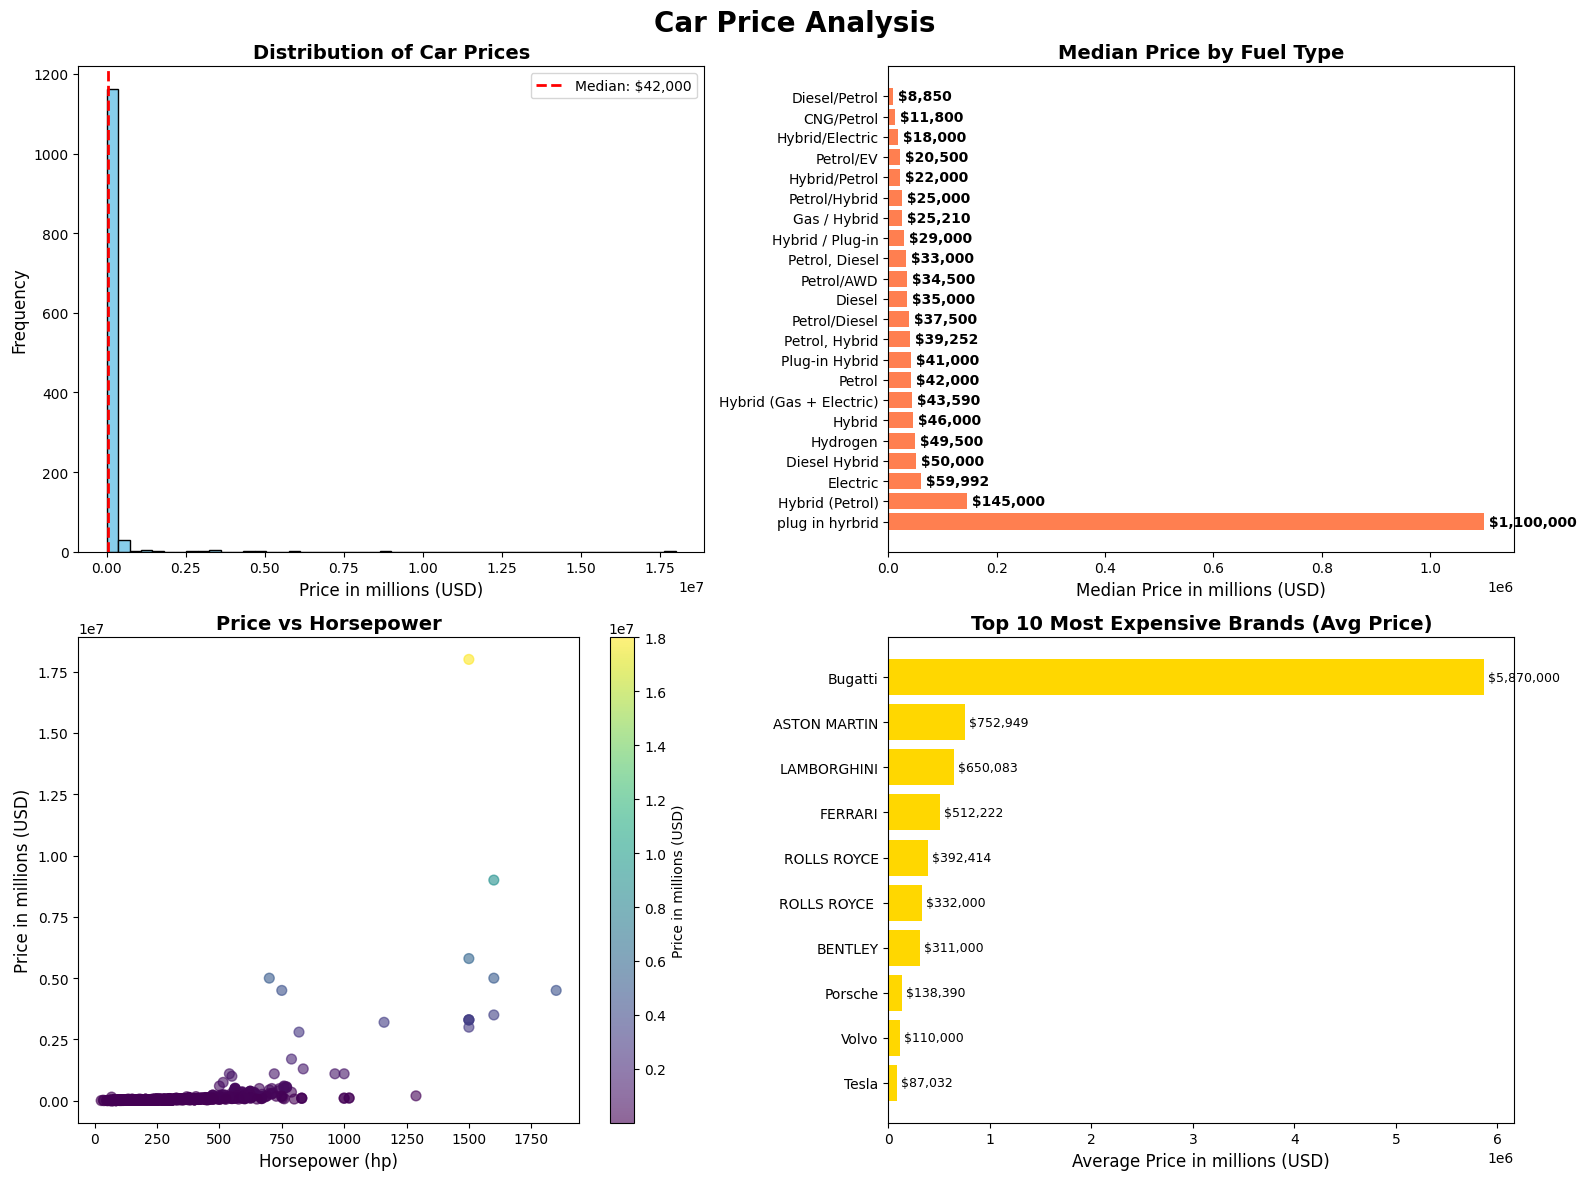

Cheapest car: $4,000
Most expensive car: $18,000,000
Average price: $137,041
Median price: $42,000

Price range: $17,996,000


In [40]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Car Price Analysis', fontsize=20, fontweight='bold')

# Price distribution
axes[0, 0].hist(Cars_data_cleaned['Car_Price(USD)'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Price in millions (USD)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Distribution of Car Prices', fontsize=14, fontweight='bold')
axes[0, 0].axvline(Cars_data_cleaned['Car_Price(USD)'].median(), color='red', 
                   linestyle='--', linewidth=2, label=f'Median: ${Cars_data_cleaned["Car_Price(USD)"].median():,.0f}')
axes[0, 0].legend()

# Price by Fuel Type
fuel_price = Cars_data_cleaned.groupby('Fuel_Type')['Car_Price(USD)'].median().sort_values(ascending=False)
axes[0, 1].barh(fuel_price.index, fuel_price.values, color='coral')
axes[0, 1].set_xlabel('Median Price in millions (USD)', fontsize=12)
axes[0, 1].set_title('Median Price by Fuel Type', fontsize=14, fontweight='bold')
for i, v in enumerate(fuel_price.values):
    axes[0, 1].text(v, i, f' ${v:,.0f}', va='center', fontweight='bold')

# Price vs HorsePower (Scatter)
scatter = axes[1, 0].scatter(Cars_data_cleaned['HorsePower(hp)'], Cars_data_cleaned['Car_Price(USD)'], 
                             alpha=0.6, c=Cars_data_cleaned['Car_Price(USD)'], cmap='viridis', s=50)
axes[1, 0].set_xlabel('Horsepower (hp)', fontsize=12)
axes[1, 0].set_ylabel('Price in millions (USD)', fontsize=12)
axes[1, 0].set_title('Price vs Horsepower', fontsize=14, fontweight='bold')
plt.colorbar(scatter, ax=axes[1, 0], label='Price in millions (USD)')

# Top 10 Most Expensive Brands by Average Price
top_companies = Cars_data_cleaned.groupby('Company_Name')['Car_Price(USD)'].mean().nlargest(10).sort_values()
axes[1, 1].barh(top_companies.index, top_companies.values, color='gold')
axes[1, 1].set_xlabel('Average Price in millions (USD)', fontsize=12)
axes[1, 1].set_title('Top 10 Most Expensive Brands (Avg Price)', fontsize=14, fontweight='bold')
for i, v in enumerate(top_companies.values):
    axes[1, 1].text(v, i, f' ${v:,.0f}', va='center', fontsize=9)
plt.tight_layout()
plt.show()

# Summary statistics
print(f"Cheapest car: ${Cars_data_cleaned['Car_Price(USD)'].min():,.0f}")
print(f"Most expensive car: ${Cars_data_cleaned['Car_Price(USD)'].max():,.0f}")
print(f"Average price: ${Cars_data_cleaned['Car_Price(USD)'].mean():,.0f}")
print(f"Median price: ${Cars_data_cleaned['Car_Price(USD)'].median():,.0f}")
print(f"\nPrice range: ${Cars_data_cleaned['Car_Price(USD)'].max() - Cars_data_cleaned['Car_Price(USD)'].min():,.0f}")

C:\Users\Fredrik\AppData\Local\Temp\ipykernel_16428\1364855016.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_fuels, y='Fuel_Type', x='(0km/h - 100km/h)sec',


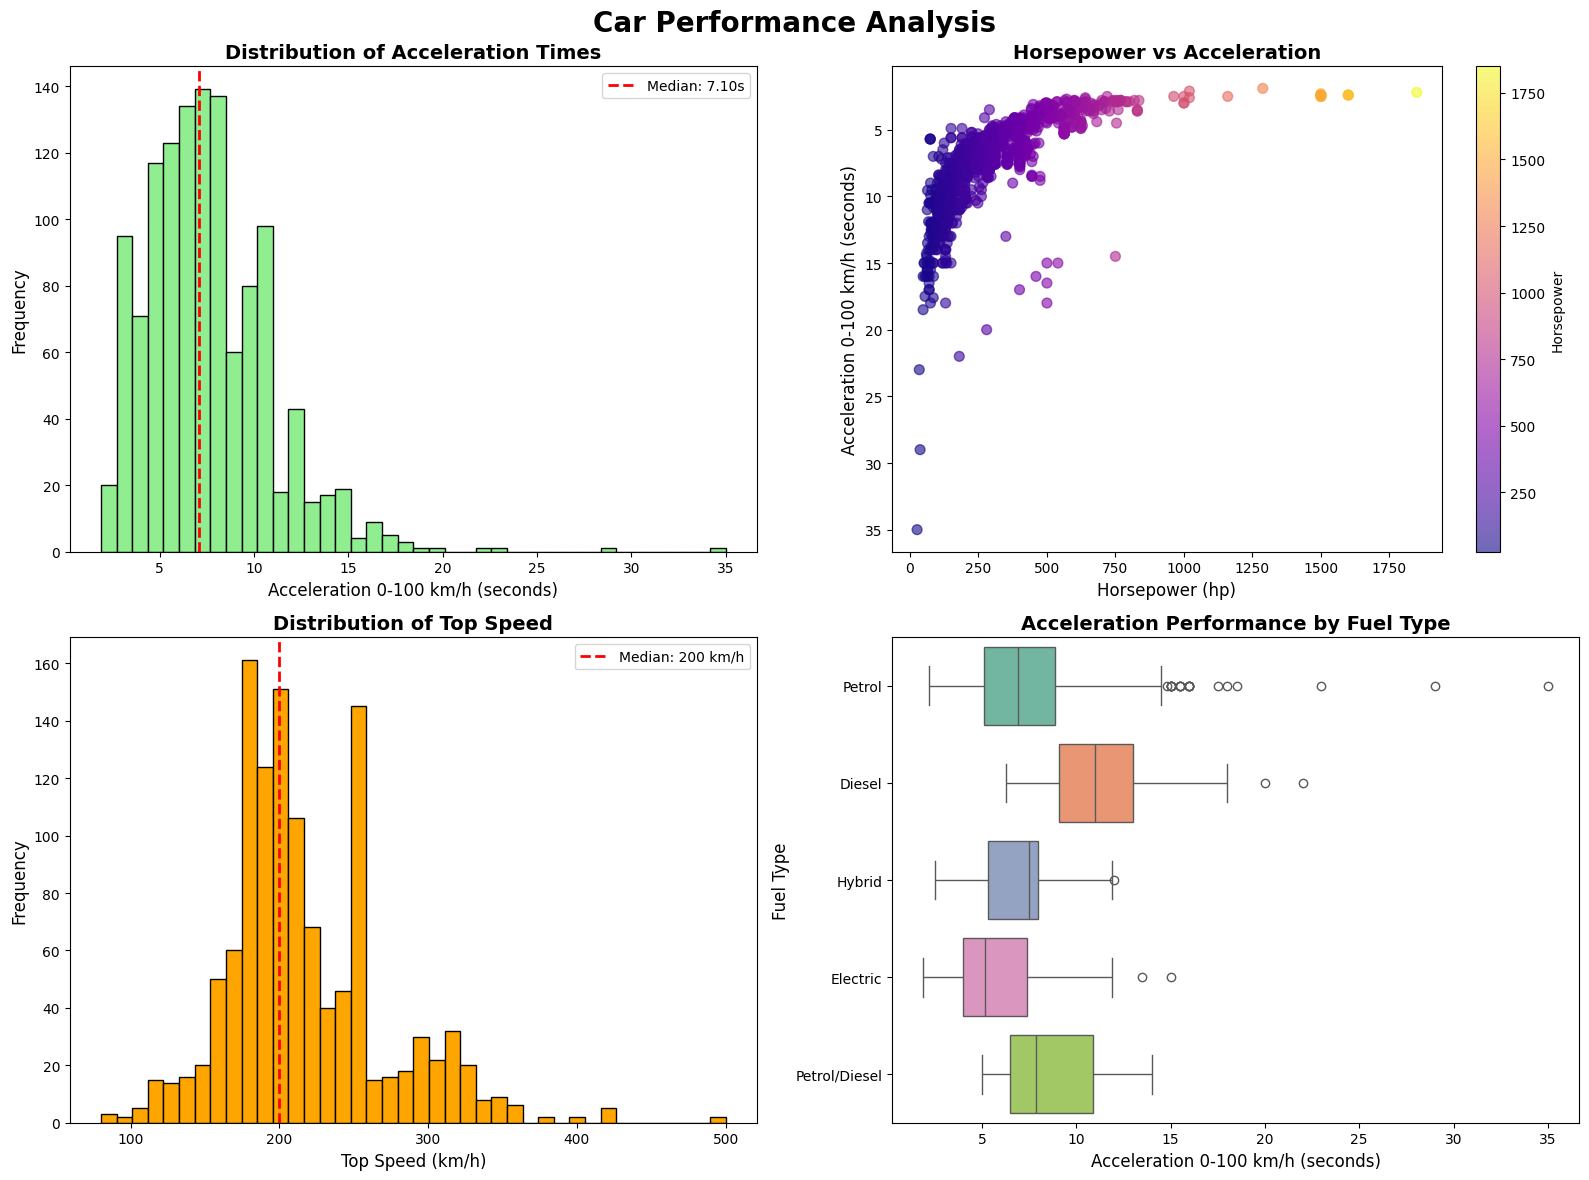

Fastest acceleration: 1.90 seconds
Slowest acceleration: 35.00 seconds
Average acceleration: 7.57 seconds

Highest top speed: 500 km/h
Lowest top speed: 80 km/h
Average top speed: 217 km/h

 Fastest Car (0-100 km/h):
   Tesla Roadster 2
   Acceleration: 1.90s
   Horsepower: 1288 hp


In [41]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Car Performance Analysis', fontsize=20, fontweight='bold')

# Acceleration Distribution (0-100 km/h)
axes[0, 0].hist(Cars_data_cleaned['(0km/h - 100km/h)sec'], bins=40, color='lightgreen', edgecolor='black')
axes[0, 0].set_xlabel('Acceleration 0-100 km/h (seconds)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Distribution of Acceleration Times', fontsize=14, fontweight='bold')
axes[0, 0].axvline(Cars_data_cleaned['(0km/h - 100km/h)sec'].median(), color='red', 
                   linestyle='--', linewidth=2, label=f'Median: {Cars_data_cleaned["(0km/h - 100km/h)sec"].median():.2f}s')
axes[0, 0].legend()

# HorsePower vs Acceleration (Scatter)
scatter2 = axes[0, 1].scatter(Cars_data_cleaned['HorsePower(hp)'], Cars_data_cleaned['(0km/h - 100km/h)sec'], 
                              alpha=0.6, c=Cars_data_cleaned['HorsePower(hp)'], cmap='plasma', s=50)
axes[0, 1].set_xlabel('Horsepower (hp)', fontsize=12)
axes[0, 1].set_ylabel('Acceleration 0-100 km/h (seconds)', fontsize=12)
axes[0, 1].set_title('Horsepower vs Acceleration', fontsize=14, fontweight='bold')
axes[0, 1].invert_yaxis()  # Lower time = better performance
plt.colorbar(scatter2, ax=axes[0, 1], label='Horsepower')

# Top Speed Distribution
axes[1, 0].hist(Cars_data_cleaned['Top_Speed(km/h)'], bins=40, color='orange', edgecolor='black')
axes[1, 0].set_xlabel('Top Speed (km/h)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Distribution of Top Speed', fontsize=14, fontweight='bold')
axes[1, 0].axvline(Cars_data_cleaned['Top_Speed(km/h)'].median(), color='red', 
                   linestyle='--', linewidth=2, label=f'Median: {Cars_data_cleaned["Top_Speed(km/h)"].median():.0f} km/h')
axes[1, 0].legend()

# Performance by Fuel Type (Box Plot)
fuel_types = Cars_data_cleaned['Fuel_Type'].value_counts().head(5).index
df_top_fuels = Cars_data_cleaned[Cars_data_cleaned['Fuel_Type'].isin(fuel_types)]
sns.boxplot(data=df_top_fuels, y='Fuel_Type', x='(0km/h - 100km/h)sec', 
            ax=axes[1, 1], palette='Set2')
axes[1, 1].set_xlabel('Acceleration 0-100 km/h (seconds)', fontsize=12)
axes[1, 1].set_ylabel('Fuel Type', fontsize=12)
axes[1, 1].set_title('Acceleration Performance by Fuel Type', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Summary statistics
print(f"Fastest acceleration: {Cars_data_cleaned['(0km/h - 100km/h)sec'].min():.2f} seconds")
print(f"Slowest acceleration: {Cars_data_cleaned['(0km/h - 100km/h)sec'].max():.2f} seconds")
print(f"Average acceleration: {Cars_data_cleaned['(0km/h - 100km/h)sec'].mean():.2f} seconds")
print(f"\nHighest top speed: {Cars_data_cleaned['Top_Speed(km/h)'].max():.0f} km/h")
print(f"Lowest top speed: {Cars_data_cleaned['Top_Speed(km/h)'].min():.0f} km/h")
print(f"Average top speed: {Cars_data_cleaned['Top_Speed(km/h)'].mean():.0f} km/h")

# Find the fastest car
fastest_car = Cars_data_cleaned[Cars_data_cleaned['(0km/h - 100km/h)sec'] == Cars_data_cleaned['(0km/h - 100km/h)sec'].min()]
print(f"\n Fastest Car (0-100 km/h):")
print(f"   {fastest_car['Company_Name'].values[0]} {fastest_car['Car_Name'].values[0]}")
print(f"   Acceleration: {fastest_car['(0km/h - 100km/h)sec'].values[0]:.2f}s")
print(f"   Horsepower: {fastest_car['HorsePower(hp)'].values[0]:.0f} hp")

C:\Users\Fredrik\AppData\Local\Temp\ipykernel_16428\2850738121.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10, y='Company_Name', x='Car_Price(USD)',


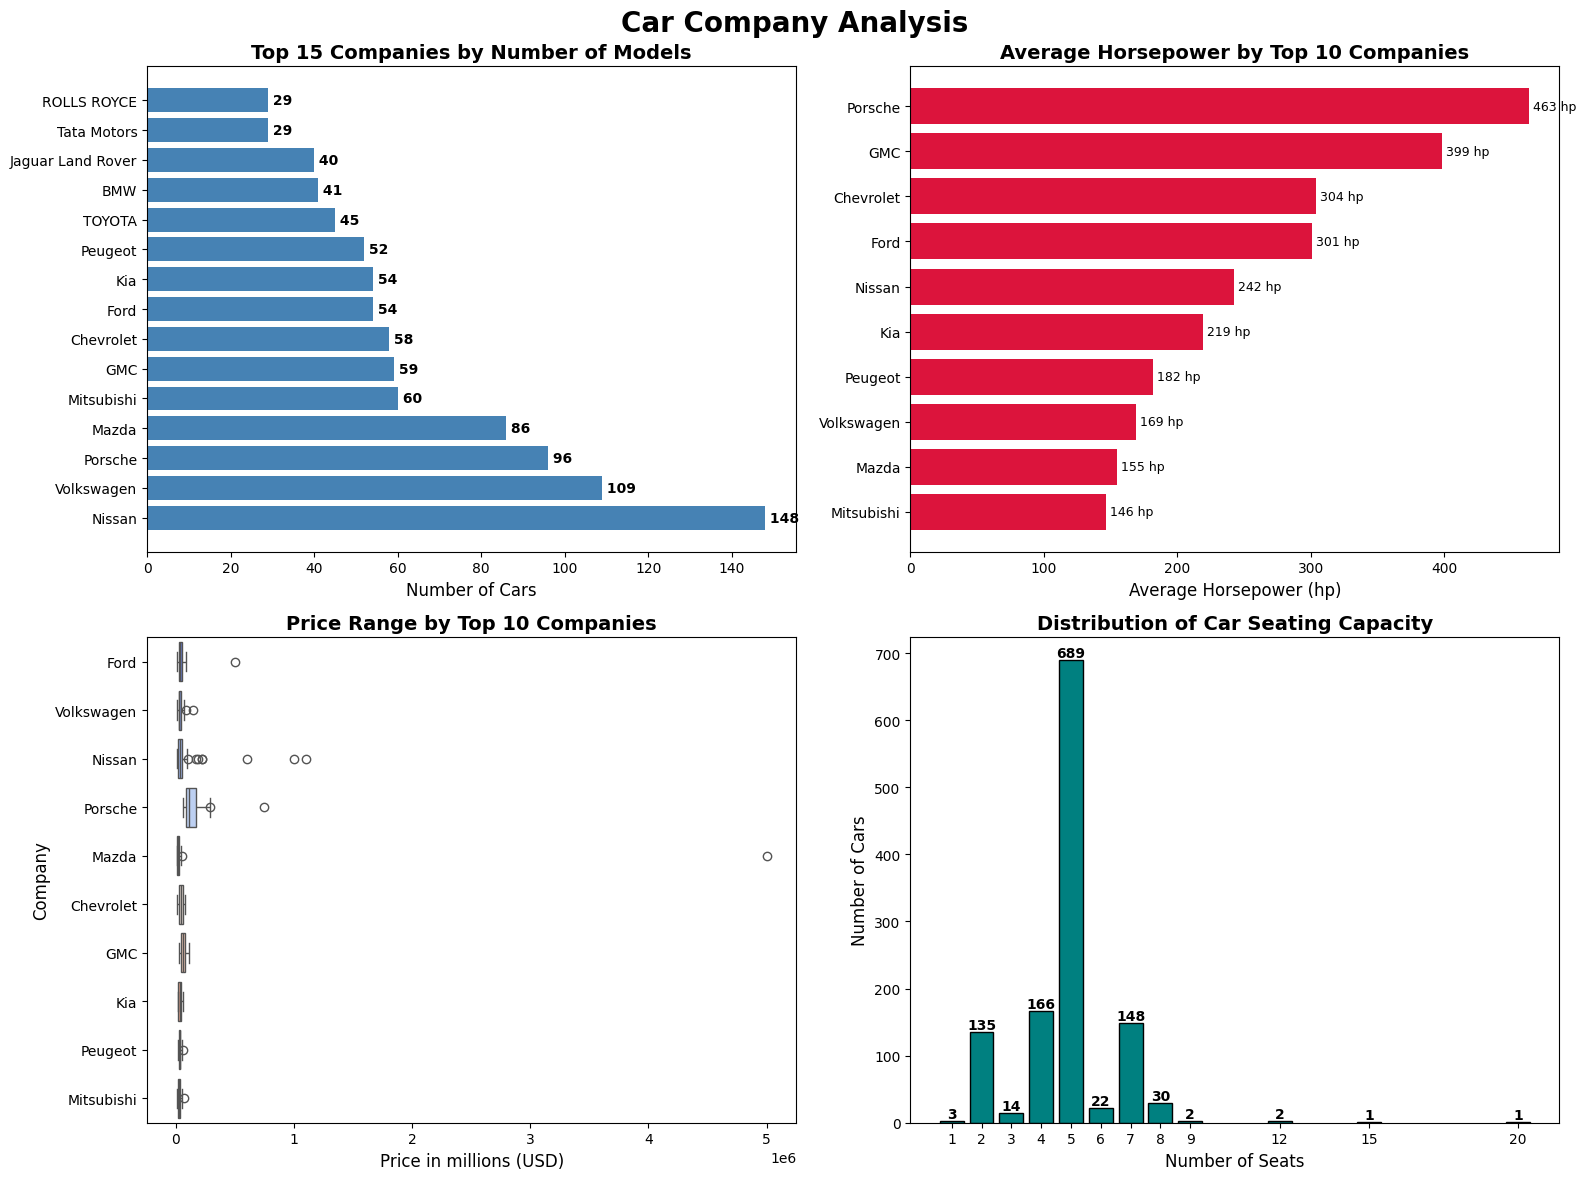

Total companies: 37

Top 5 companies by number of models:
  1. Nissan: 148 models
  2. Volkswagen: 109 models
  3. Porsche: 96 models
  4. Mazda: 86 models
  5. Mitsubishi: 60 models

Most common seating capacity: 5 seats


In [42]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Car Company Analysis', fontsize=20, fontweight='bold')

# Top 15 Companies by Number of Cars
top_companies_count = Cars_data_cleaned['Company_Name'].value_counts().head(15)
axes[0, 0].barh(top_companies_count.index, top_companies_count.values, color='steelblue')
axes[0, 0].set_xlabel('Number of Cars', fontsize=12)
axes[0, 0].set_title('Top 15 Companies by Number of Models', fontsize=14, fontweight='bold')
for i, v in enumerate(top_companies_count.values):
    axes[0, 0].text(v, i, f' {v}', va='center', fontweight='bold')

# Average Horsepower by Top 10 Companies
top_10_companies = Cars_data_cleaned['Company_Name'].value_counts().head(10).index
hp_by_company = Cars_data_cleaned[Cars_data_cleaned['Company_Name'].isin(top_10_companies)].groupby('Company_Name')['HorsePower(hp)'].mean().sort_values()
axes[0, 1].barh(hp_by_company.index, hp_by_company.values, color='crimson')
axes[0, 1].set_xlabel('Average Horsepower (hp)', fontsize=12)
axes[0, 1].set_title('Average Horsepower by Top 10 Companies', fontsize=14, fontweight='bold')
for i, v in enumerate(hp_by_company.values):
    axes[0, 1].text(v, i, f' {v:.0f} hp', va='center', fontsize=9)

# Price Range by Top 10 Companies (Box Plot)
df_top_10 = Cars_data_cleaned[Cars_data_cleaned['Company_Name'].isin(top_10_companies)]
sns.boxplot(data=df_top_10, y='Company_Name', x='Car_Price(USD)', 
            ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_xlabel('Price in millions (USD)', fontsize=12)
axes[1, 0].set_ylabel('Company', fontsize=12)
axes[1, 0].set_title('Price Range by Top 10 Companies', fontsize=14, fontweight='bold')

# Number of Seats Distribution
seats_dist = Cars_data_cleaned['Number_of_Seats'].value_counts().sort_index()
axes[1, 1].bar(seats_dist.index, seats_dist.values, color='teal', edgecolor='black')
axes[1, 1].set_xlabel('Number of Seats', fontsize=12)
axes[1, 1].set_ylabel('Number of Cars', fontsize=12)
axes[1, 1].set_title('Distribution of Car Seating Capacity', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(seats_dist.index)
for i, v in enumerate(seats_dist.values):
    axes[1, 1].text(seats_dist.index[i], v, f'{v}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Total companies: {Cars_data_cleaned['Company_Name'].nunique()}")
print(f"\nTop 5 companies by number of models:")
for i, (company, count) in enumerate(top_companies_count.head(5).items(), 1):
    print(f"  {i}. {company}: {count} models")

mode_val = Cars_data_cleaned['Number_of_Seats'].mode().iloc[0]
num = pd.to_numeric(mode_val, errors='coerce')
if pd.notna(num):
    print(f"\nMost common seating capacity: {int(num)} seats")
else:
    print(f"\nMost common seating capacity: {mode_val} seats")    

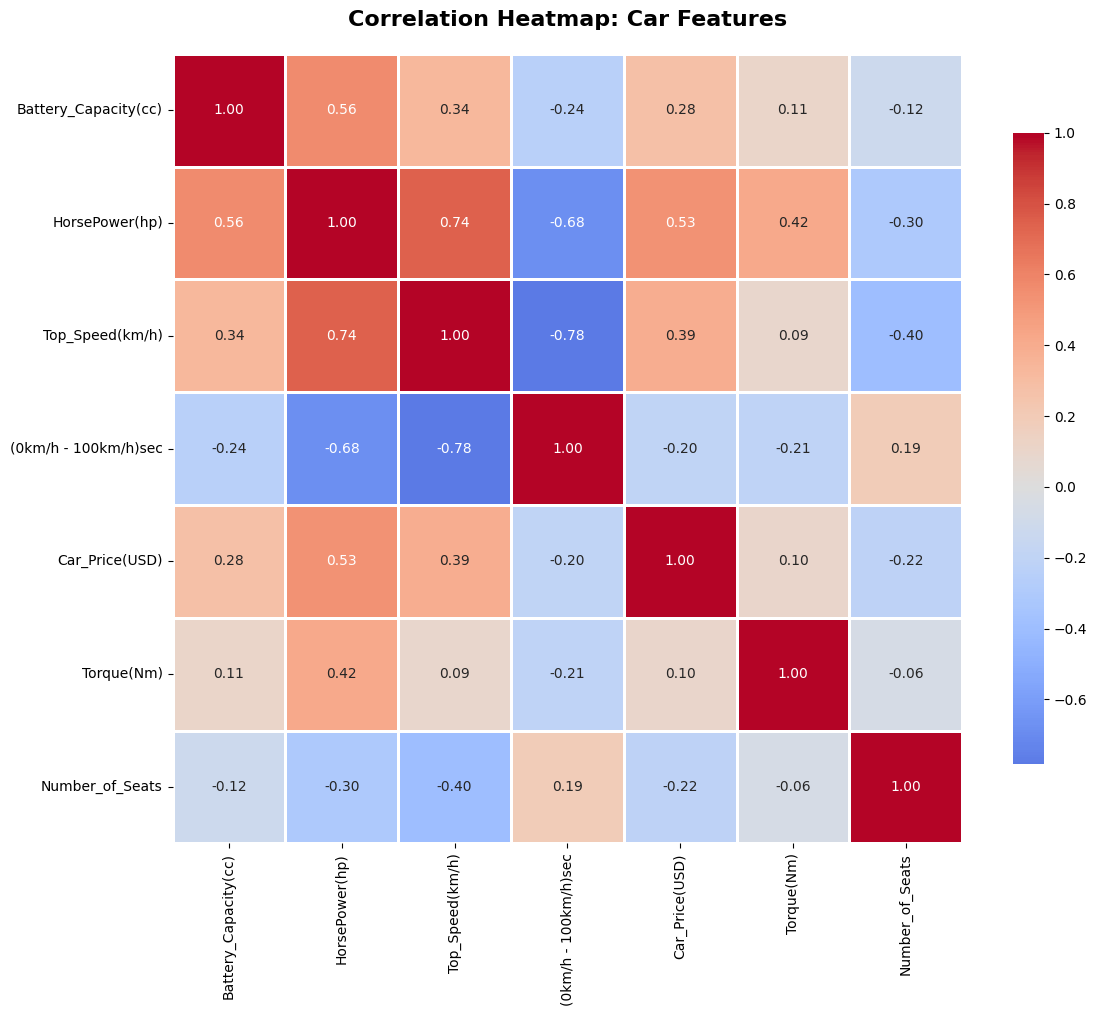


Strongest positive correlations with Price:
Car_Price(USD)          1.000000
HorsePower(hp)          0.532200
Top_Speed(km/h)         0.390042
Battery_Capacity(cc)    0.276682
Torque(Nm)              0.096861
Name: Car_Price(USD), dtype: float64


In [43]:
plt.figure(figsize=(12, 10))

# Select numerical columns (Number_of_Seats may contain non-numeric values like '2+2')
numerical_cols = ['Battery_Capacity(cc)', 'HorsePower(hp)', 'Top_Speed(km/h)', 
                  '(0km/h - 100km/h)sec', 'Car_Price(USD)', 'Torque(Nm)', 'Number_of_Seats']

# Safely convert selected columns to numeric (coerce invalid parsing to NaN)
df_numeric = Cars_data_cleaned[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Calculate correlation matrix on numeric data
correlation_matrix = df_numeric.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap: Car Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nStrongest positive correlations with Price:")
price_corr = correlation_matrix['Car_Price(USD)'].sort_values(ascending=False)
print(price_corr.head(5))

## 12. Export

In [44]:
Cars_data_cleaned.to_csv('Cars_Datasets_cleaned.csv', index=False)

# Statistical Hypothesis Testing

In [45]:
Cars_dataset = pd.read_csv('Cars_Datasets_cleaned.csv')
print(f"Dataset: {len(Cars_dataset)} cars")
print(f"Features: {len(Cars_dataset.columns)} columns\n")

Dataset: 1213 cars
Features: 11 columns



## Testing Hypothesis 1

Cars with >300 hp accelerate significantly faster than cars with <300 hp


High HP (>300) group:
  - Sample size: 469 cars
  - Mean acceleration: 5.07 seconds
  - Std deviation: 2.08 seconds

Low HP (≤300) group:
  - Sample size: 744 cars
  - Mean acceleration: 9.14 seconds
  - Std deviation: 2.94 seconds

Difference in means: 4.07 seconds

 Statistical Test Results 
Test type: Independent samples t-test
T-statistic: -26.0889
P-value: 0.000000
Significance level: 0.05

CONCLUSION: The difference IS statistically significant (p < 0.05).
  High horsepower cars accelerate significantly faster than low horsepower cars.


C:\Users\Fredrik\AppData\Local\Temp\ipykernel_16428\3150749964.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(data_to_plot, labels=['Low HP (≤300)', 'High HP (>300)'])


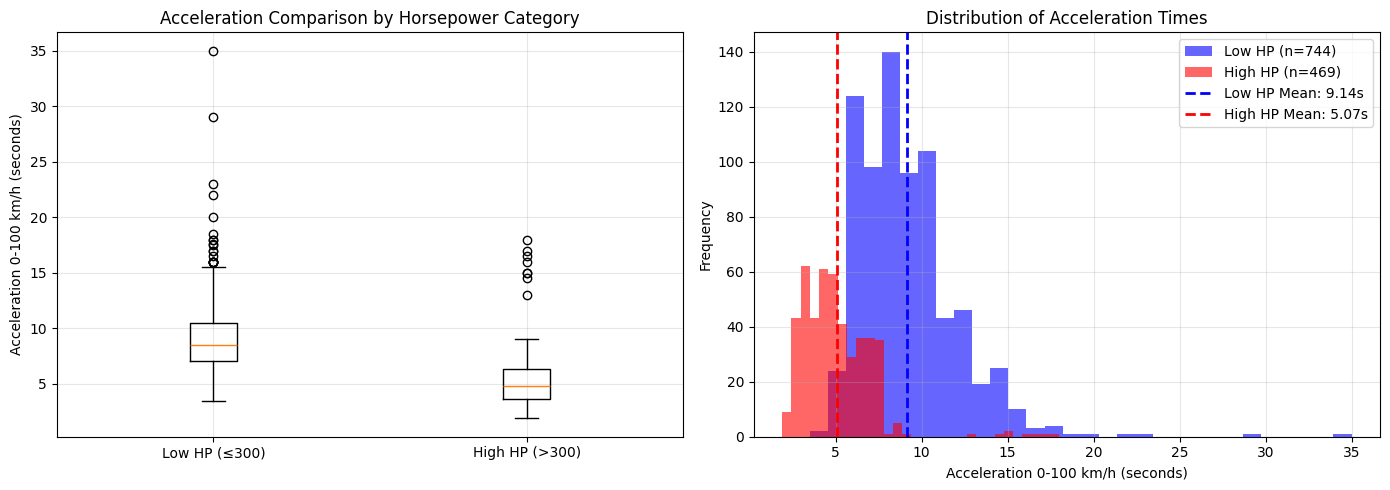

  - P-value: 0.000000
  - Result: SIGNIFICANT


In [46]:
# Creating two groups
high_hp = Cars_dataset[Cars_dataset['HorsePower(hp)'] > 300]['(0km/h - 100km/h)sec']
low_hp = Cars_dataset[Cars_dataset['HorsePower(hp)'] <= 300]['(0km/h - 100km/h)sec']

print(f"\nHigh HP (>300) group:")
print(f"  - Sample size: {len(high_hp)} cars")
print(f"  - Mean acceleration: {high_hp.mean():.2f} seconds")
print(f"  - Std deviation: {high_hp.std():.2f} seconds")

print(f"\nLow HP (≤300) group:")
print(f"  - Sample size: {len(low_hp)} cars")
print(f"  - Mean acceleration: {low_hp.mean():.2f} seconds")
print(f"  - Std deviation: {low_hp.std():.2f} seconds")

print(f"\nDifference in means: {abs(high_hp.mean() - low_hp.mean()):.2f} seconds")

# Performing independent t-test
t_statistic, p_value = stats.ttest_ind(high_hp, low_hp)

print(f"\n Statistical Test Results ")
print(f"Test type: Independent samples t-test")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Significance level: 0.05")

if p_value < 0.05:
    print(f"\nCONCLUSION: The difference IS statistically significant (p < 0.05).")
    print(f"  High horsepower cars accelerate significantly faster than low horsepower cars.")
else:
    print(f"\nCONCLUSION: The difference is NOT statistically significant (p ≥ 0.05)")
    print(f"  Cannot conclude that horsepower significantly affects acceleration.")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot comparison
data_to_plot = [low_hp, high_hp]
axes[0].boxplot(data_to_plot, labels=['Low HP (≤300)', 'High HP (>300)'])
axes[0].set_ylabel('Acceleration 0-100 km/h (seconds)')
axes[0].set_title('Acceleration Comparison by Horsepower Category')
axes[0].grid(True, alpha=0.3)

# Distribution comparison
axes[1].hist(low_hp, bins=30, alpha=0.6, label=f'Low HP (n={len(low_hp)})', color='blue')
axes[1].hist(high_hp, bins=30, alpha=0.6, label=f'High HP (n={len(high_hp)})', color='red')
axes[1].axvline(low_hp.mean(), color='blue', linestyle='--', linewidth=2, label=f'Low HP Mean: {low_hp.mean():.2f}s')
axes[1].axvline(high_hp.mean(), color='red', linestyle='--', linewidth=2, label=f'High HP Mean: {high_hp.mean():.2f}s')
axes[1].set_xlabel('Acceleration 0-100 km/h (seconds)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Acceleration Times')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"  - P-value: {p_value:.6f}")
print(f"  - Result: {'SIGNIFICANT' if p_value < 0.05 else 'NOT SIGNIFICANT'}")

## Test Hypothesis 2

There is a relationship between number of seats and the performance of the car
- Define performance categories based on acceleration
- Sports/Performance: 0-100 km/h in ≤6 seconds
- Normal: 0-100 km/h in >6 seconds


Performance categories defined:
  - Sports/Performance: 0-100 km/h ≤ 6 seconds
  - Normal: 0-100 km/h > 6 seconds

Category distribution:
Performance_Type
Normal                787
Sports/Performance    426
Name: count, dtype: int64

 Contingency Table 
Performance_Type  Normal  Sports/Performance
Number_of_Seats                             
1                      0                   3
2                     38                  97
3                     14                   0
4                     57                 109
5                    491                 198
6                     20                   2
7                    135                  13
8                     26                   4
9                      2                   0
12                     2                   0
15                     1                   0
20                     1                   0

 Contingency Table with Totals 
Performance_Type  Normal  Sports/Performance  Total
Number_of_Seats               

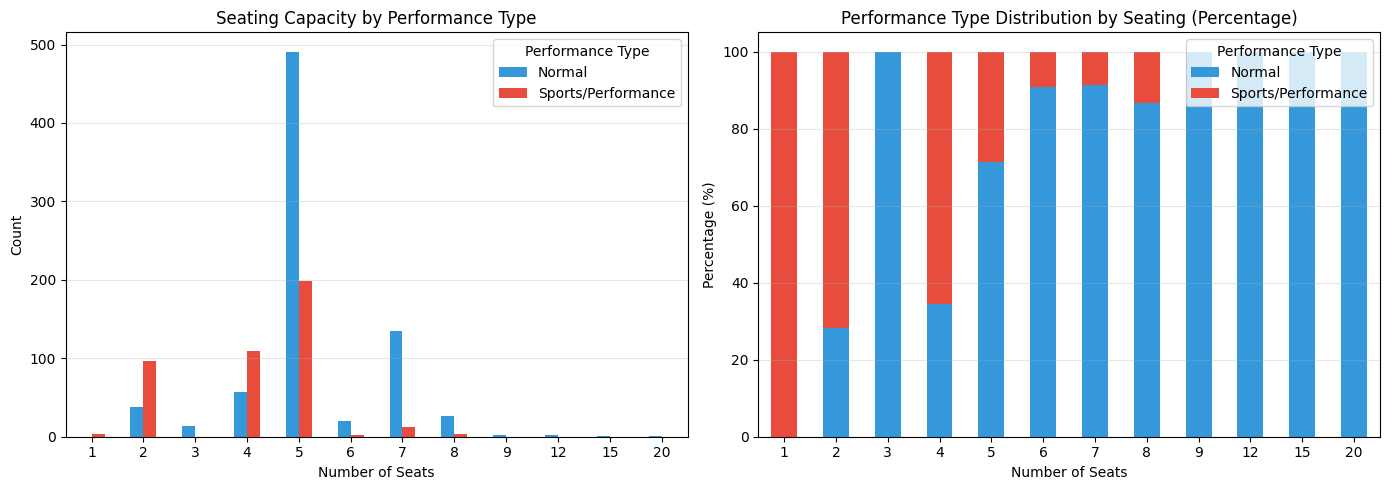


 Sports/Performance Car Percentage by Seating 
1 seats: 100.0% are sports/performance cars
2 seats: 71.9% are sports/performance cars
4 seats: 65.7% are sports/performance cars
5 seats: 28.7% are sports/performance cars
8 seats: 13.3% are sports/performance cars
6 seats: 9.1% are sports/performance cars
7 seats: 8.8% are sports/performance cars
3 seats: 0.0% are sports/performance cars
9 seats: 0.0% are sports/performance cars
12 seats: 0.0% are sports/performance cars
15 seats: 0.0% are sports/performance cars
20 seats: 0.0% are sports/performance cars
  - P-value: 0.000000
  - Result: SIGNIFICANT


In [48]:
# Defining performance categories
Cars_dataset['Performance_Type'] = Cars_dataset['(0km/h - 100km/h)sec'].apply(
    lambda x: 'Sports/Performance' if x <= 6 else 'Normal'
)

print(f"\nPerformance categories defined:")
print(f"  - Sports/Performance: 0-100 km/h ≤ 6 seconds")
print(f"  - Normal: 0-100 km/h > 6 seconds")

print(f"\nCategory distribution:")
print(Cars_dataset['Performance_Type'].value_counts())

# Creating contingency table
contingency_table = pd.crosstab(Cars_dataset['Number_of_Seats'], Cars_dataset['Performance_Type'])

print(f"\n Contingency Table ")
print(contingency_table)

# Adding row and column totals for better understanding
contingency_with_totals = contingency_table.copy()
contingency_with_totals['Total'] = contingency_with_totals.sum(axis=1)
contingency_with_totals.loc['Total'] = contingency_with_totals.sum()

print(f"\n Contingency Table with Totals ")
print(contingency_with_totals)

# Performing chi-square test
chi2, p_value_chi, dof, expected_freq = stats.chi2_contingency(contingency_table)

print(f"\n Statistical Test Results ")
print(f"Test type: Chi-square test of independence")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value_chi:.6f}")
print(f"Significance level: 0.05")

if p_value_chi < 0.05:
    print(f"\nCONCLUSION: There IS a significant relationship (p < 0.05)")
    print(f"  Number of seats and performance type are related.")
    print(f"  Certain seating configurations are associated with sports/performance cars.")
else:
    print(f"\nCONCLUSION: There is NO significant relationship (p ≥ 0.05)")
    print(f"  Number of seats and performance type are independent.")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grouped bar chart
contingency_table.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_xlabel('Number of Seats')
axes[0].set_ylabel('Count')
axes[0].set_title('Seating Capacity by Performance Type')
axes[0].legend(title='Performance Type')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Stacked percentage bar chart
contingency_pct = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
contingency_pct.plot(kind='bar', stacked=True, ax=axes[1], color=['#3498db', '#e74c3c'])
axes[1].set_xlabel('Number of Seats')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_title('Performance Type Distribution by Seating (Percentage)')
axes[1].legend(title='Performance Type')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# Showing which seating configurations have highest sports car percentage
print(f"\n Sports/Performance Car Percentage by Seating ")
sports_pct = (contingency_table['Sports/Performance'] / contingency_table.sum(axis=1) * 100).sort_values(ascending=False)
for seats, pct in sports_pct.items():
    print(f"{seats} seats: {pct:.1f}% are sports/performance cars")

print(f"  - P-value: {p_value:.6f}")
print(f"  - Result: {'SIGNIFICANT' if p_value < 0.05 else 'NOT SIGNIFICANT'}")    